In [2]:
import cython

In [3]:
%load_ext cython

In [4]:
%%cython -a


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, levy_stable
import scipy
from statsmodels.distributions.empirical_distribution import ECDF 
import pandas as pd
from matplotlib.colors import LogNorm, Normalize

sns.set_style("darkgrid")
pi = np.pi


alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
# xs = np.linspace(50, 100, 50)
xs = np.linspace(100,300, 50)
n = 10000
MC = 10

alpha_n = 5
beta_n = 5
gamma = 2
delta = 0



def _stable_random_variables(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha
    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables(alpha, beta, gamma, delta):
    Z = _stable_random_variables(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta
    
def sym_alpha_from_cdf(alpha, beta, gamma, delta, xs, n):
    Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
    ecdf = ECDF(Xs)
    Fx = ecdf(xs)
    a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
    return -a

def sym_alpha_from_cf(alpha, beta, gamma, delta, ts, n):
    tn = len(ts)
    Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
    Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for i in range(n)] for _ in range(tn)])
    Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
    Z = np.mean(Xs, 1)
    a, b  =np.polyfit(np.log(ts), np.log(-np.log(np.abs(Z))), 1)
    return a

def hita_map_MSE(metod, alpha, beta, gamma, delta, xs, n, MC):
    ak = np.array([metod(alpha, beta, gamma, delta, xs, n) for _ in range(MC)])
    ak = ak[~np.isnan(ak)]
    return np.sum(np.power(np.array([alpha]*len(ak))-ak, 2)) / n

def hita_map_MAE(metod, alpha, beta, gamma, delta, xs, n, MC):
    ak = np.array([metod(alpha, beta, gamma, delta, xs, n) for _ in range(MC)])
    ak = ak[~np.isnan(ak)]
    return np.sum(np.abs(np.array([alpha]*len(ak))-ak)) / n

# CDF

## alpha beta

In [36]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
# xs = np.linspace(100,300, 50)
xs = np.linspace(10,20, 20)
n = 5000
MC = 100

alpha_n = 15
beta_n = 15

alphas = np.linspace(0.01, 1.99, alpha_n)
betas = np.linspace(-0.99, 0.99, beta_n)

In [37]:
cdf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]

/tmp/ipykernel_235207/515062152.py:1: RuntimeWarning: overflow encountered in scalar power
  cdf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/515062152.py:1: RuntimeWarning: overflow encountered in scalar multiply
  cdf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/515062152.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  cdf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/515062152.py:1: RuntimeWarning: invalid value encountered in scalar multiply
  cdf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cdf, alpha, beta, gam

/tmp/ipykernel_215683/3075822103.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_MSE_alpha_beta = cdf_hist_MSE_data_alpha_beta_df.pivot("beta","alpha", "MSE")


<Axes: xlabel='alpha', ylabel='beta'>

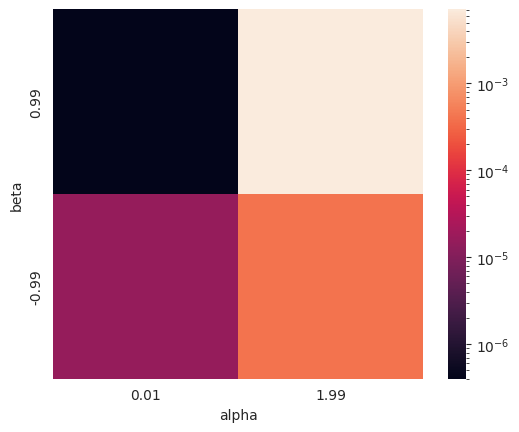

In [ ]:
cdf_hist_MSE_data_alpha_beta_df = pd.DataFrame(cdf_hist_MSE_data_alpha_beta, columns=["MSE", "alpha", "beta"])
# cdf_hist_data_df
flights_MSE_alpha_beta = cdf_hist_MSE_data_alpha_beta_df.pivot("beta","alpha", "MSE")
sns.heatmap(flights_MSE_alpha_beta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
# plt.savefig("raport_1/latex/images/heatmap_cdf_MSE_alpha_beta.png")

In [ ]:
cdf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]

/tmp/ipykernel_235207/2937900511.py:1: RuntimeWarning: overflow encountered in scalar power
  cdf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/2937900511.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  cdf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/2937900511.py:1: RuntimeWarning: overflow encountered in scalar multiply
  cdf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/2937900511.py:1: RuntimeWarning: invalid value encountered in scalar multiply
  cdf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cdf, alpha, beta,

/tmp/ipykernel_235207/784010194.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_MAE_alpha_beta = cdf_hist_MAE_data_alpha_beta_df.pivot("beta","alpha", "MAE")


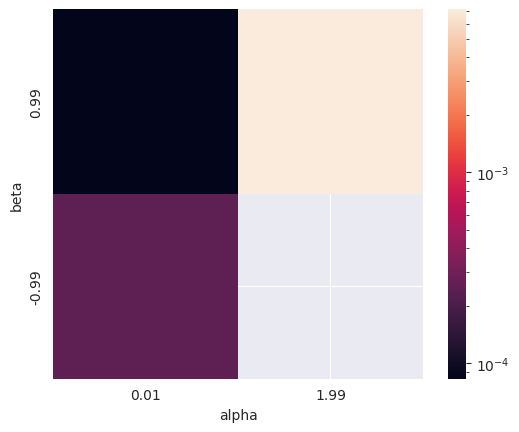

In [ ]:
cdf_hist_MAE_data_alpha_beta_df = pd.DataFrame(cdf_hist_MAE_data_alpha_beta, columns=["MAE", "alpha", "beta"])
# cdf_hist_data_df
flights_MAE_alpha_beta = cdf_hist_MAE_data_alpha_beta_df.pivot("beta","alpha", "MAE")
sns.heatmap(flights_MAE_alpha_beta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
plt.savefig("raport_1/latex/images/heatmap_cdf_MAE_alpha_beta.png")

## gamma delta cdf

In [ ]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
xs = np.linspace(10,20, 20)
n = 5000
MC = 100

gamma_n = 15
delta_n = 15
gammas = np.linspace(0.01, 4, gamma_n)
deltas = np.linspace(-5, 5, delta_n)

In [ ]:
cdf_hist_data_MSE_gamma_delta = [[hita_map_MSE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(gamma,3), round(delta, 3)] for gamma in gammas for delta in deltas]

In [ ]:
cdf_hist_data_MSE_gamma_delta_df = pd.DataFrame(cdf_hist_data_MSE_gamma_delta, columns=["MSE", "gamma", "delta"])
# cdf_hist_data_df
cdf_flights_MSE_gamma_delta = cdf_hist_data_MSE_gamma_delta_df.pivot("gamma","delta", "MSE")
sns.heatmap(cdf_flights_MSE_gamma_delta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
# plt.savefig("raport_1/latex/images/heatmap_cdf_MSE_gamma_delta.png")

NameError: name 'cdf_hist_data_MSE_gamma_delta' is not defined

In [ ]:
cdf_hist_data_MAE_gamma_delta = [[hita_map_MAE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(gamma,3), round(delta, 3)] for gamma in gammas for delta in deltas]

/tmp/ipykernel_235207/3456744693.py:1: RuntimeWarning: divide by zero encountered in log
  cdf_hist_data_MAE_gamma_delta = [[hita_map_MAE(sym_alpha_from_cdf, alpha, beta, gamma, delta, xs, n, MC), round(gamma,3), round(delta, 3)] for gamma in gammas for delta in deltas]


/tmp/ipykernel_235207/2825446303.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_MAE_gamma_delta = cdf_hist_data_MAE_gamma_delta_df.pivot("gamma","delta", "MSE")


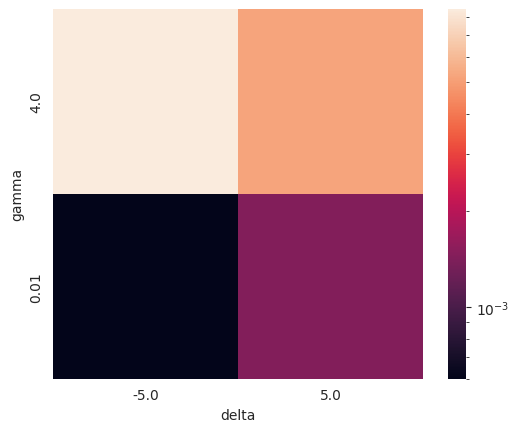

In [ ]:
cdf_hist_data_MAE_gamma_delta_df = pd.DataFrame(cdf_hist_data_MAE_gamma_delta, columns=["MSE", "gamma", "delta"])
# cdf_hist_data_df
flights_MAE_gamma_delta = cdf_hist_data_MAE_gamma_delta_df.pivot("gamma","delta", "MSE")
sns.heatmap(flights_MAE_gamma_delta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
plt.savefig("raport_1/latex/images/heatmap_cdf_MAE_gamma_delta.png")

# CF

## alpha beta

In [ ]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
dt = 0.05
ts = np.arange(0.2, 1, dt)
n = 5000
MC = 100

alpha_n = 15
beta_n = 15

alphas = np.linspace(0.01, 1.99, alpha_n)
betas = np.linspace(-0.99, 0.99, beta_n)




In [ ]:
cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]

/tmp/ipykernel_235207/4035376206.py:1: RuntimeWarning: overflow encountered in scalar power
  cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/4035376206.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/4035376206.py:1: RuntimeWarning: invalid value encountered in scalar multiply
  cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/4035376206.py:1: RuntimeWarning: overflow encountered in scalar divide
  cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, de

/tmp/ipykernel_235207/1509451787.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  cf_flights_MSE_alpha_beta = cf_hist_MSE_data_alpha_beta_df.pivot("beta","alpha", "MSE")


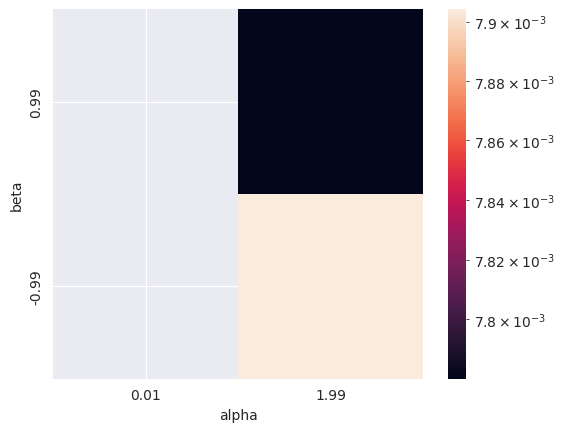

In [ ]:
cf_hist_MSE_data_alpha_beta_df = pd.DataFrame(cf_hist_MSE_data_alpha_beta, columns=["MSE", "alpha", "beta"])
# cdf_hist_data_df
cf_flights_MSE_alpha_beta = cf_hist_MSE_data_alpha_beta_df.pivot("beta","alpha", "MSE")
sns.heatmap(cf_flights_MSE_alpha_beta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
plt.savefig("raport_1/latex/images/heatmap_cf_MSE_alpha_beta.png")
plt.show()

In [ ]:
cf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]

/tmp/ipykernel_235207/1294705549.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  cf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/1294705549.py:1: RuntimeWarning: overflow encountered in scalar multiply
  cf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/1294705549.py:1: RuntimeWarning: overflow encountered in scalar power
  cf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/1294705549.py:1: RuntimeWarning: invalid value encountered in scalar multiply
  cf_hist_MAE_data_alpha_beta = [[hita_map_MAE(sym_alpha_from_cf, alpha, beta, gamma, 

/tmp/ipykernel_235207/3840324258.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  cf_flights_MAE_alpha_beta = cf_hist_MAE_data_alpha_beta_df.pivot("beta","alpha", "MAE")


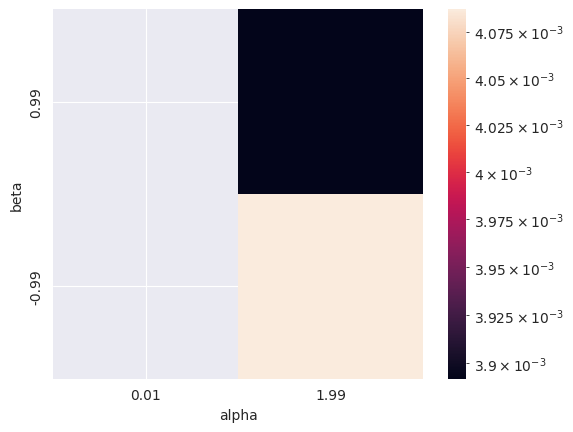

In [ ]:
cf_hist_MAE_data_alpha_beta_df = pd.DataFrame(cf_hist_MAE_data_alpha_beta, columns=["MAE", "alpha", "beta"])
# cdf_hist_data_df
cf_flights_MAE_alpha_beta = cf_hist_MAE_data_alpha_beta_df.pivot("beta","alpha", "MAE")
sns.heatmap(cf_flights_MAE_alpha_beta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
plt.savefig("raport_1/latex/images/heatmap_cf_MAE_alpha_beta.png")

## gamma delta

In [ ]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
dt = 0.05
ts = np.arange(0.2, 1, dt)
n = 5000
MC = 100

gamma_n = 15
delta_n = 15
gammas = np.linspace(0.01, 4, gamma_n)
deltas = np.linspace(-5, 5, delta_n)

In [ ]:
cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]


/tmp/ipykernel_235207/778070774.py:1: RuntimeWarning: overflow encountered in scalar multiply
  cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/778070774.py:1: RuntimeWarning: overflow encountered in scalar power
  cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/778070774.py:1: RuntimeWarning: overflow encountered in scalar divide
  cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]
/tmp/ipykernel_235207/778070774.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  cf_hist_MSE_data_alpha_beta = [[hita_map_MSE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, 

/tmp/ipykernel_235207/3859909668.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  cf_flights_MSE_gamma_delta = cf_hist_data_MSE_gamma_delta_df.pivot("gamma","delta", "MSE")


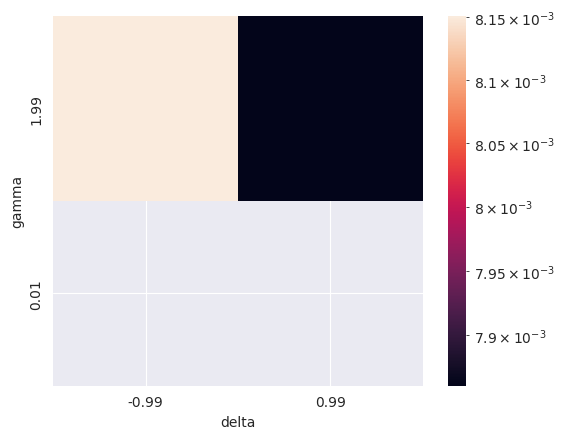

In [ ]:
cf_hist_data_MSE_gamma_delta_df = pd.DataFrame(cf_hist_MSE_data_alpha_beta, columns=["MSE", "gamma", "delta"])
# cdf_hist_data_df
cf_flights_MSE_gamma_delta = cf_hist_data_MSE_gamma_delta_df.pivot("gamma","delta", "MSE")
sns.heatmap(cf_flights_MSE_gamma_delta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
plt.savefig("raport_1/latex/images/heatmap_cf_MSE_gamma_delta.png")

In [ ]:
cf_hist_data_MAE_gamma_delta = [[hita_map_MAE(sym_alpha_from_cf, alpha, beta, gamma, delta, xs, n, MC), round(gamma,3), round(delta, 3)] for gamma in gammas for delta in deltas]

/tmp/ipykernel_235207/4025977078.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  cf_flights_MAE_gamma_delta = cf_hist_data_MAE_gamma_delta_df.pivot("gamma","delta", "MSE")


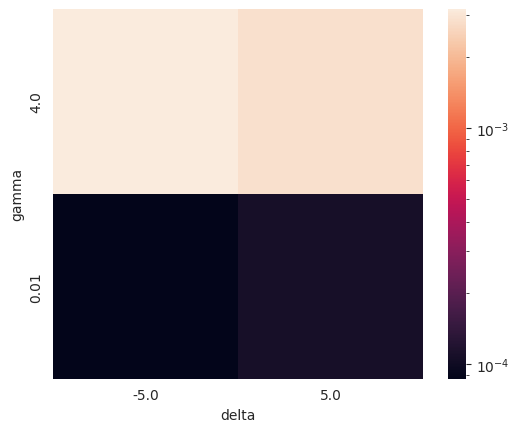

In [ ]:
cf_hist_data_MAE_gamma_delta_df = pd.DataFrame(cf_hist_data_MAE_gamma_delta, columns=["MSE", "gamma", "delta"])
# cdf_hist_data_df
cf_flights_MAE_gamma_delta = cf_hist_data_MAE_gamma_delta_df.pivot("gamma","delta", "MSE")
sns.heatmap(cf_flights_MAE_gamma_delta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
plt.savefig("raport_1/latex/images/heatmap_cf_MAE_gamma_delta.png")